# Analysis for Training Data

In [1]:
import json, pathlib
with open("./training_data/Mobile_LLaMA_main.json", "r", encoding="utf-8") as f:
    training_data = json.load(f)
    
print(training_data[0])

{'instruction': 'Identify the MOASes that announce AS 2497 and determine the path inflation.', 'input': 'ASN: 2497\nFilter: path "_2497_"', 'output': 'import pybgpstream\nfrom collections import Counter\n\nstream = pybgpstream.BGPStream(\n    from_time="2020-10-01 00:00:00",\n    until_time="2020-10-31 00:00:00",\n    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe"],\n    record_type="updates",\n    filter="path \\"_2497_\\""\n)\n\nas_paths = []\n\nfor rec in stream.records():\n    for elem in rec:\n      if elem.type == "A":\n        as_paths.append(elem.fields["as-path"].split()[0])\n\nmoases = Counter(as_paths).most_common()\n\n# Calculate path inflation\npath_inflation = 0\nfor moas in moases:\n    path_inflation += (moas[1] - 1)\n\nprint(f"MOASes: {moases}")\nprint(f"Path inflation for AS 2497: {path_inflation}")', 'most_similar_instructions': {'Collect BGP update data for January 5, 2017, from multiple RouteViews collectors. Calculate and visualize the hour

## Analyze the Question

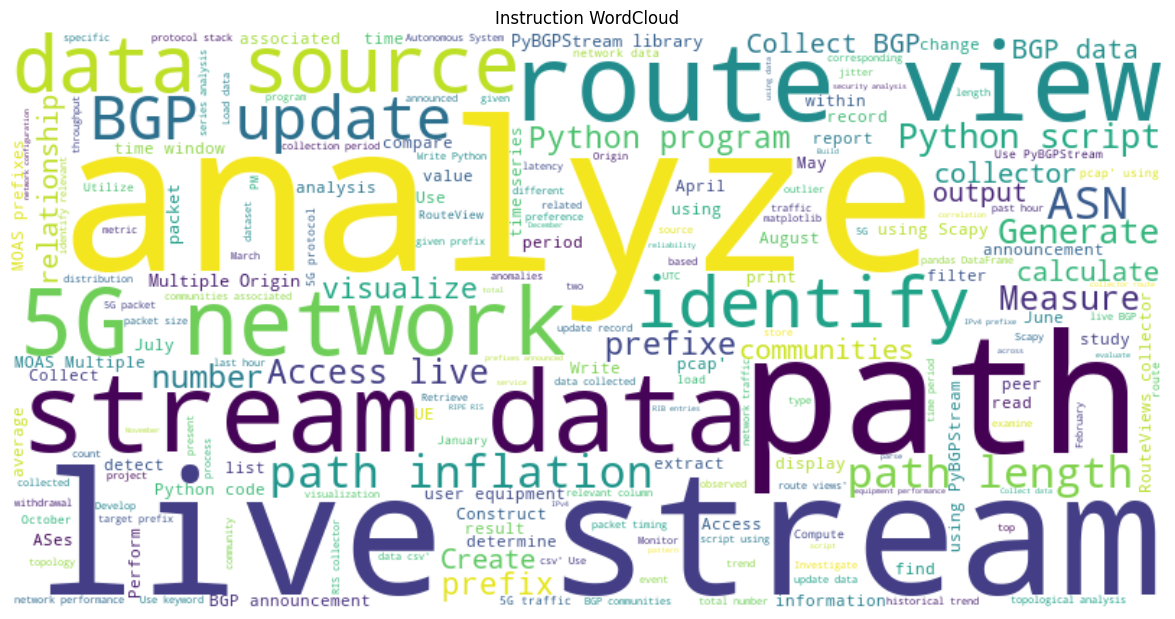

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_target_wordcloud(target):
    text = ""
    for data in training_data:
        if isinstance(data[target], dict):
            text += " ".join(data[target].keys())
        elif isinstance(data[target], str):
            text += data[target]

    # 创建词云对象
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, random_state=52).generate(text)
    return wordcloud

target = "instruction"
instruction_wordcloud = get_target_wordcloud(target)
# 显示词云图像
plt.figure(figsize=(15, 7.5))
plt.imshow(instruction_wordcloud, interpolation='bilinear')
plt.title("Instruction WordCloud")
plt.axis('off')  # 不显示坐标轴
plt.show()

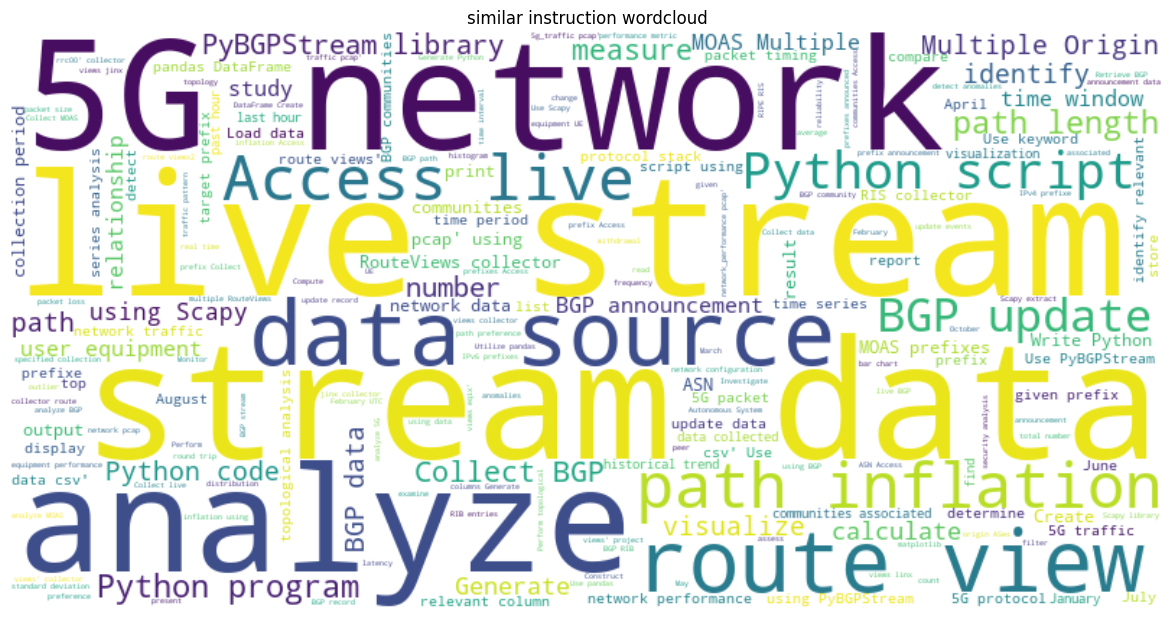

In [3]:
similar_instruction_wordcloud = get_target_wordcloud(target="most_similar_instructions")

# 显示词云图像
plt.figure(figsize=(15, 7.5))
plt.imshow(similar_instruction_wordcloud, interpolation='bilinear')
plt.title("similar instruction wordcloud")
plt.axis('off')  # 不显示坐标轴
plt.show()

## Analyze output

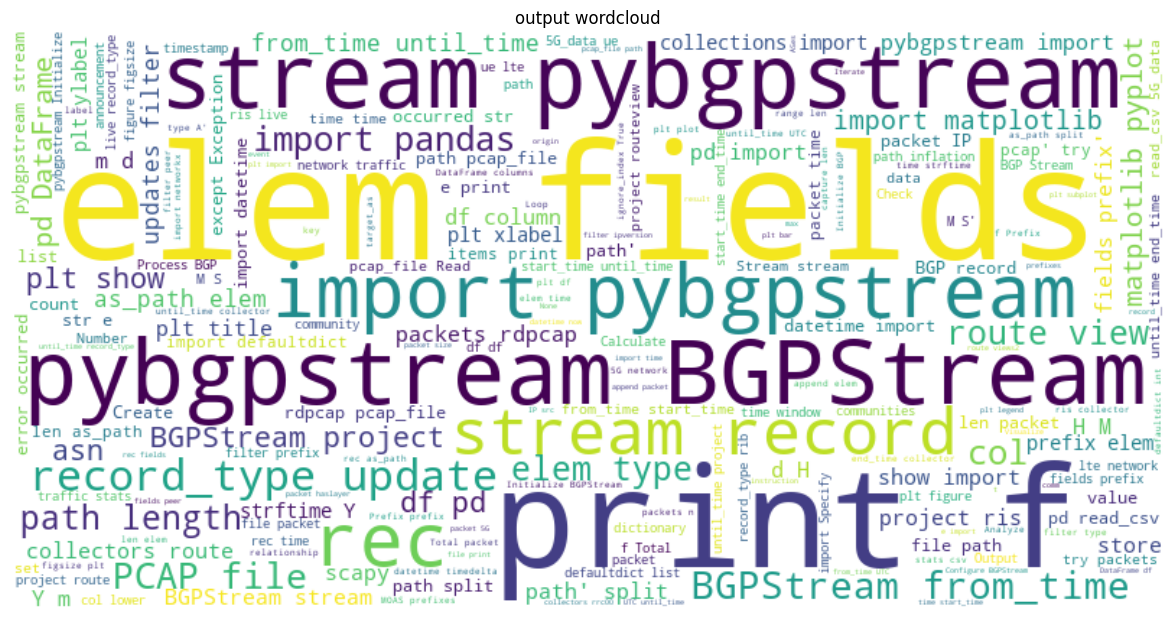

In [4]:
output_wordcloud = get_target_wordcloud(target="output")
plt.figure(figsize=(15, 7.5))
plt.imshow(output_wordcloud, interpolation='bilinear')
plt.title("output wordcloud")
plt.axis('off')  # 不显示坐标轴
plt.show()